Dataset loaded successfully.
Column names: Index(['embed_0', 'embed_1', 'embed_2', 'embed_3', 'embed_4', 'embed_5',
       'embed_6', 'embed_7', 'embed_8', 'embed_9',
       ...
       'embed_375', 'embed_376', 'embed_377', 'embed_378', 'embed_379',
       'embed_380', 'embed_381', 'embed_382', 'embed_383', 'output'],
      dtype='object', length=385)
Row 0: Inputs = [-0.08992592  0.34387389], Expected = 0.0, Step = 0, Error = 0.0
Row 1: Inputs = [0.30326107 0.08492954], Expected = 0.0, Step = 0, Error = 0.0
Row 2: Inputs = [-0.27429068  0.21680066], Expected = 0.0, Step = 0, Error = 0.0
Row 3: Inputs = [0.11867615 0.09557237], Expected = 0.0, Step = 0, Error = 0.0
Row 4: Inputs = [0.29877168 0.3006745 ], Expected = 0.0, Step = 0, Error = 0.0
Row 5: Inputs = [-0.4289749   0.27361414], Expected = 0.0, Step = 0, Error = 0.0
Row 6: Inputs = [-0.4759773   0.25378817], Expected = 0.0, Step = 0, Error = 0.0
Row 7: Inputs = [-0.32009268  0.11347137], Expected = 0.0, Step = 0, Error = 0.0
Row 

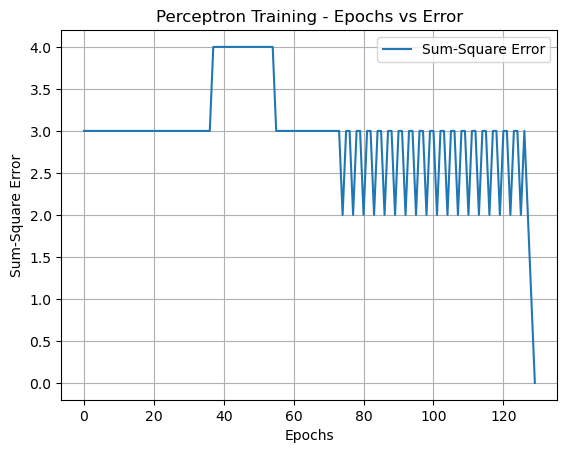

Activation Type: bi-polar
Final Weights and Bias after 1000 epochs:
W0 (Bias): -0.04999999999999749, W1: 0.14999999999999902, W2: 0.10000000000000643


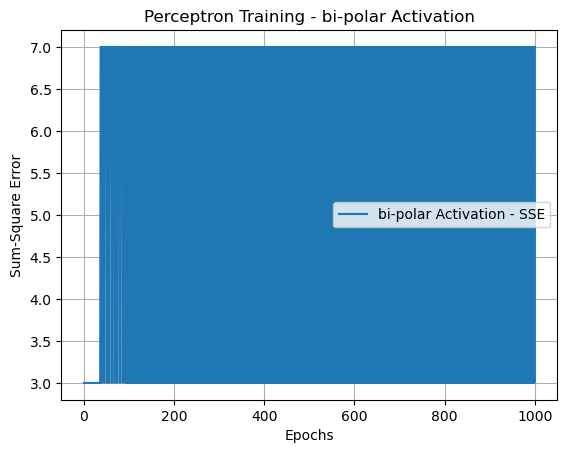

Activation Type: sigmoid
Final Weights and Bias after 1000 epochs:
W0 (Bias): -6.138441288794357, W1: 3.972930097636246, W2: 3.9660533642901323


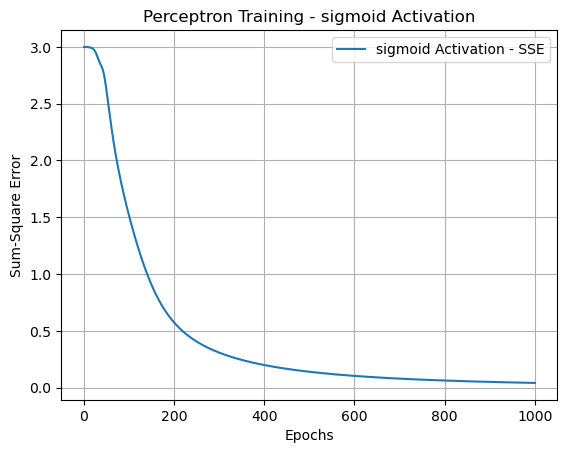

Activation Type: relu
Final Weights and Bias after 389 epochs:
W0 (Bias): -0.9277447198109581, W1: 0.9511600082912268, W2: 0.9498108559260638


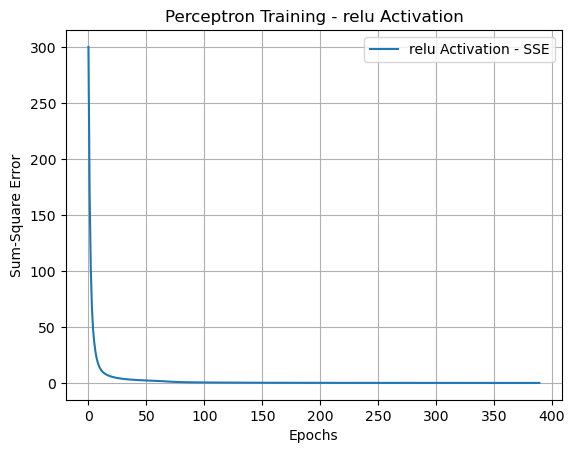

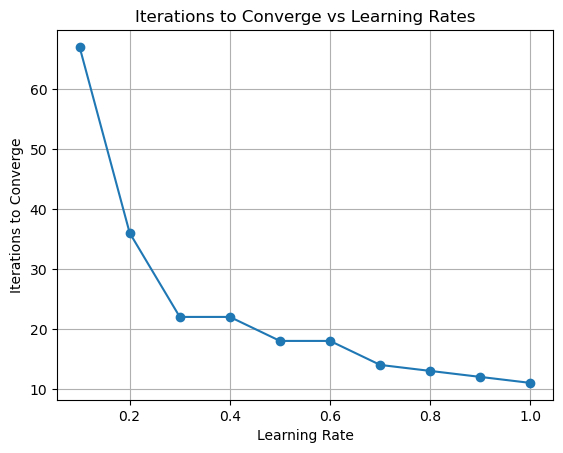

Running Question 5 - XOR Gate Perceptron Training

Training Perceptron with Step Activation Function for XOR:
Weights: [ 0.10537996 -0.15073589 -0.19563447]

Training Perceptron with Bipolar Step Activation Function for XOR:
Weights: [ 0.37516611 -0.30064077 -0.25803246]

Training Perceptron with Sigmoid Activation Function for XOR:
Weights: [ 0.05128182 -0.10256357 -0.05128181]

Training Perceptron with ReLU Activation Function for XOR:
Weights: [ 0.55555556 -0.11111111 -0.05555556]


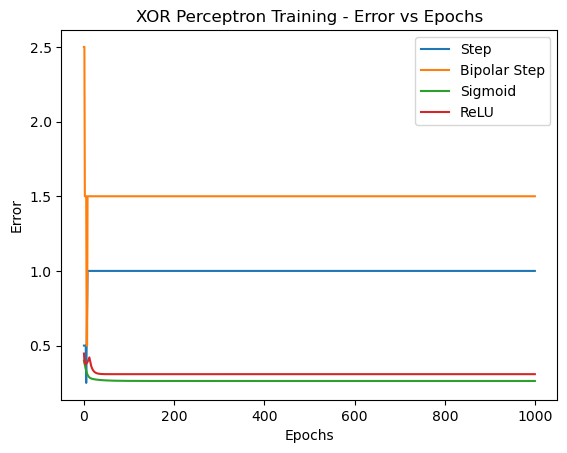


Running Question 6 - Your Data Perceptron Training


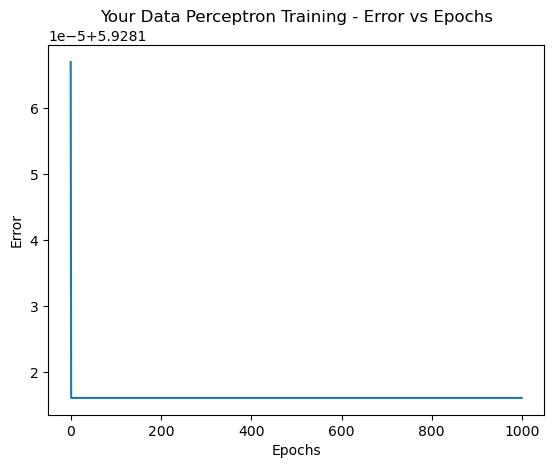


Running Question 7 - Matrix Pseudo-Inverse Comparison for XOR
Pseudo-Inverse Weights for XOR: [0.5 0.  0. ]

Running Question 8 - Backpropagation Neural Network for AND Gate
Backpropagation Weights (Input-Hidden): [[ 0.44603913 -0.13178158]
 [ 0.58947571  1.53750575]]
Backpropagation Weights (Hidden-Output): [-0.29874802  0.3695009 ]


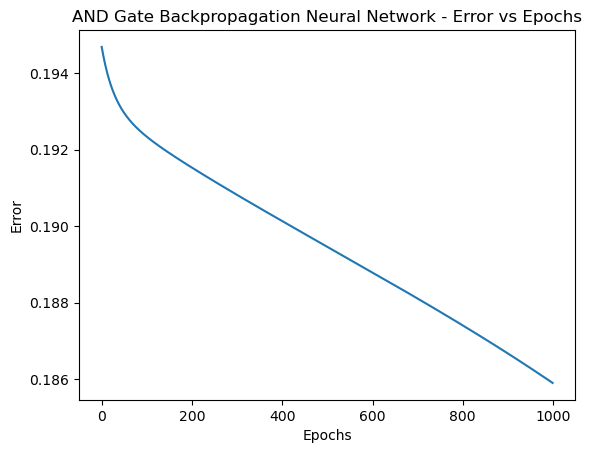

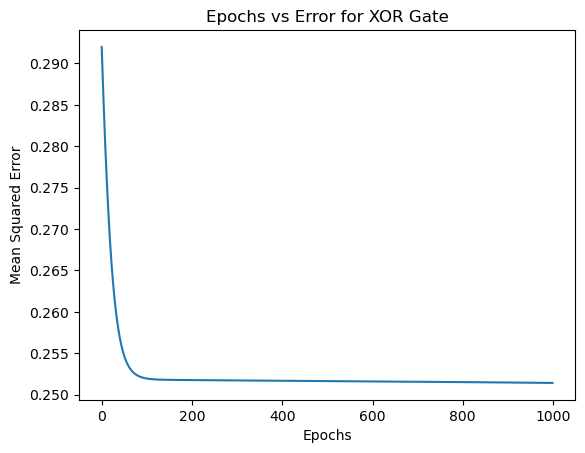

Final weights (input to hidden): [[ 0.52938707 -0.16677805]
 [ 0.66878165  1.51796229]]
Final weights (hidden to output): [ 0.21999712 -0.0889015 ]


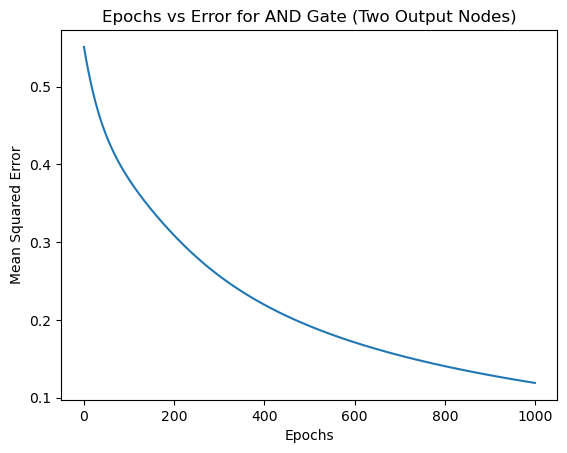

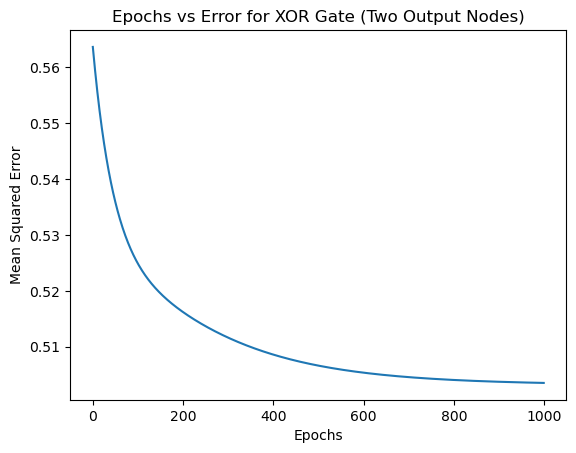

AND Gate Prediction (MLP): [0 0 0 0]
XOR Gate Prediction (MLP): [0 0 0 0]
Transaction Classification (MLP): [0 0 0 ... 1 1 1]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
def function_modules(dataset_path):
    """
    Function that performs the following:
    1. Load dataset from a given path.
    2. Perform summation using inputs and weights.
    3. Apply different activation functions.
    4. Compare the output with the expected value and calculate error.

    :param dataset_path: Path to the dataset file on your laptop.
    """

    # Step 1: Load dataset (assuming an Excel file with columns for embeddings and 'output')
    try:
        df = pd.read_excel(dataset_path)  # Use read_excel for Excel files
        print("Dataset loaded successfully.")
        print("Column names:", df.columns)  # Print column names for debugging
    except FileNotFoundError:
        print(f"Error: The file at {dataset_path} was not found.")
        return
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Selecting two embedding columns and the output column
    input_columns = ['embed_0', 'embed_1']  # Adjust these as necessary
    output_column = 'output'

    # Ensure that the required columns are present
    if not all(col in df.columns for col in input_columns + [output_column]):
        print(f"Error: Dataset must contain the following columns: {input_columns + [output_column]}")
        return

    # Initialize weights and bias (these can be adjusted or learned in practice)
    weights = np.array([0.5, 0.5])  # Example weights for the two inputs
    bias = -0.5  # Example bias term

    # Lists to store the outputs and errors
    step_outputs = []
    sigmoid_outputs = []
    tanh_outputs = []
    relu_outputs = []
    leaky_relu_outputs = []
    errors = []

    # Activation functions
    def step_activation(weighted_sum):
        return 1 if weighted_sum >= 0 else 0

    def sigmoid_activation(weighted_sum):
        return 1 / (1 + np.exp(-weighted_sum))

    def tanh_activation(weighted_sum):
        return np.tanh(weighted_sum)

    def relu_activation(weighted_sum):
        return max(0, weighted_sum)

    def leaky_relu_activation(weighted_sum, alpha=0.01):
        return weighted_sum if weighted_sum >= 0 else alpha * weighted_sum

    def error_comparator(actual_output, expected_output):
        return np.mean((actual_output - expected_output) ** 2)

    # Step 2: Iterate through the dataset and perform calculations
    for index, row in df.iterrows():
        inputs = np.array([row[input_columns[0]], row[input_columns[1]]])
        expected_output = row[output_column]

        # Summation Unit
        weighted_sum = np.dot(inputs, weights) + bias

        # Apply each activation function
        output_step = step_activation(weighted_sum)
        output_sigmoid = sigmoid_activation(weighted_sum)
        output_tanh = tanh_activation(weighted_sum)
        output_relu = relu_activation(weighted_sum)
        output_leaky_relu = leaky_relu_activation(weighted_sum)

        # Error calculation for the Step function (can be extended for others)
        error = error_comparator(output_step, expected_output)

        # Store results
        step_outputs.append(output_step)
        sigmoid_outputs.append(output_sigmoid)
        tanh_outputs.append(output_tanh)
        relu_outputs.append(output_relu)
        leaky_relu_outputs.append(output_leaky_relu)
        errors.append(error)

        print(f"Row {index}: Inputs = {inputs}, Expected = {expected_output}, "
              f"Step = {output_step}, Error = {error}")

    # Step 3: Return the results as a DataFrame for further analysis
    result_df = pd.DataFrame({
        'embed_0': df[input_columns[0]],
        'embed_1': df[input_columns[1]],
        'Expected': df[output_column],
        'Step_Output': step_outputs,
        'Sigmoid_Output': sigmoid_outputs,
        'TanH_Output': tanh_outputs,
        'ReLU_Output': relu_outputs,
        'Leaky_ReLU_Output': leaky_relu_outputs,
        'Error': errors
    })

    print("\nFinal Results:")
    print(result_df)

    return result_df


def perceptron_and_gate():
    """
    A perceptron to learn AND gate logic using a step activation function. 
    It will update weights based on the learning rate and plot the sum-square-error after each epoch.
    """
    # Initialize weights and bias
    W0 = 10    # Bias
    W1 = 0.2   # Weight for first input
    W2 = -0.75  # Weight for second input
    alpha = 0.05  # Learning rate

    # Training data for AND gate (input1, input2, expected_output)
    training_data = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 1, 1]
    ])

    # Step activation function
    def step_activation(weighted_sum):
        return 1 if weighted_sum >= 0 else 0

    # Lists to store the sum of square errors and epochs for plotting
    errors = []
    epochs = []
    epoch_count = 0

    # Training loop
    while True:
        total_error = 0
        for row in training_data:
            input1 = row[0]
            input2 = row[1]
            expected_output = row[2]

            # Weighted sum: W0*1 (bias) + W1*input1 + W2*input2
            weighted_sum = W0 + W1 * input1 + W2 * input2

            # Step activation function output
            output = step_activation(weighted_sum)

            # Error calculation (difference between expected output and actual output)
            error = expected_output - output

            # Weight updates (delta rule)
            W0 += alpha * error * 1        # Update bias (as 1 is the input to bias)
            W1 += alpha * error * input1   # Update weight for input1
            W2 += alpha * error * input2   # Update weight for input2

            # Sum square error calculation
            total_error += error ** 2

        # Append the total error for this epoch
        errors.append(total_error)
        epochs.append(epoch_count)

        # Check if the learning has converged (error < 0.002) or if max epochs (1000) are reached
        if total_error <= 0.002 or epoch_count >= 1000:
            break

        # Increment epoch counter
        epoch_count += 1

    # Print final weights and bias
    print(f"Final Weights and Bias after {epoch_count} epochs:")
    print(f"W0 (Bias): {W0}, W1: {W1}, W2: {W2}")

    # Plotting the sum-square error versus epochs
    plt.plot(epochs, errors, label="Sum-Square Error")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Square Error")
    plt.title("Perceptron Training - Epochs vs Error")
    plt.legend()
    plt.grid(True)
    plt.show()


def perceptron_with_activation(activation_type):
    """
    A perceptron to learn AND gate logic using different activation functions.
    It will update weights based on the learning rate and plot the sum-square-error after each epoch.
    
    :param activation_type: The type of activation function ('bi-polar', 'sigmoid', 'relu').
    """
    # Initialize weights and bias
    W0 = 10    # Bias
    W1 = 0.2   # Weight for first input
    W2 = -0.75  # Weight for second input
    alpha = 0.05  # Learning rate

    # Training data for AND gate (input1, input2, expected_output)
    training_data = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 1, 1]
    ])

    # Activation functions
    def bi_polar_step(weighted_sum):
        if weighted_sum > 0:
            return 1
        elif weighted_sum == 0:
            return 0
        else:
            return -1

    def sigmoid(weighted_sum):
        return 1 / (1 + np.exp(-weighted_sum))

    def relu(weighted_sum):
        return max(0, weighted_sum)

    # Function to return appropriate activation function based on input
    if activation_type == 'bi-polar':
        activation_function = bi_polar_step
    elif activation_type == 'sigmoid':
        activation_function = sigmoid
    elif activation_type == 'relu':
        activation_function = relu
    else:
        raise ValueError("Invalid activation function type")

    # Lists to store the sum of square errors and epochs for plotting
    errors = []
    epochs = []
    epoch_count = 0

    # Training loop
    while True:
        total_error = 0
        for row in training_data:
            input1 = row[0]
            input2 = row[1]
            expected_output = row[2]

            # Weighted sum: W0*1 (bias) + W1*input1 + W2*input2
            weighted_sum = W0 + W1 * input1 + W2 * input2

            # Activation function output
            output = activation_function(weighted_sum)

            # Error calculation (difference between expected output and actual output)
            error = expected_output - output

            # Weight updates (delta rule)
            W0 += alpha * error * 1        # Update bias (as 1 is the input to bias)
            W1 += alpha * error * input1   # Update weight for input1
            W2 += alpha * error * input2   # Update weight for input2

            # Sum square error calculation
            total_error += error ** 2

        # Append the total error for this epoch
        errors.append(total_error)
        epochs.append(epoch_count)

        # Check if the learning has converged (error < 0.002) or if max epochs (1000) are reached
        if total_error <= 0.002 or epoch_count >= 1000:
            break

        # Increment epoch counter
        epoch_count += 1

    # Print final weights and bias
    print(f"Activation Type: {activation_type}")
    print(f"Final Weights and Bias after {epoch_count} epochs:")
    print(f"W0 (Bias): {W0}, W1: {W1}, W2: {W2}")

    # Plotting the sum-square error versus epochs
    plt.plot(epochs, errors, label=f"{activation_type} Activation - SSE")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Square Error")
    plt.title(f"Perceptron Training - {activation_type} Activation")
    plt.legend()
    plt.grid(True)
    plt.show()

    return epoch_count, errors


def perceptron_with_learning_rate_variation():
    """
    A perceptron to learn AND gate logic with varying learning rates, 
    keeping the initial weights the same. The function will plot 
    the number of iterations taken for learning to converge 
    against the learning rates.
    """
    # Define the learning rates to test
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    # Initialize weights and bias (these will remain the same for each learning rate)
    W0_init = 10    # Bias
    W1_init = 0.2   # Weight for first input
    W2_init = -0.75  # Weight for second input

    # Training data for AND gate (input1, input2, expected_output)
    training_data = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 1, 1]
    ])

    # Step activation function
    def step_activation(weighted_sum):
        return 1 if weighted_sum >= 0 else 0

    # List to store the number of iterations for each learning rate
    iterations_to_converge = []

    # Loop over different learning rates
    for alpha in learning_rates:
        # Reset weights to the initial values for each learning rate
        W0 = W0_init
        W1 = W1_init
        W2 = W2_init

        epoch_count = 0  # Epoch counter

        # Training loop
        while True:
            total_error = 0
            for row in training_data:
                input1 = row[0]
                input2 = row[1]
                expected_output = row[2]

                # Weighted sum: W0*1 (bias) + W1*input1 + W2*input2
                weighted_sum = W0 + W1 * input1 + W2 * input2

                # Step activation function output
                output = step_activation(weighted_sum)

                # Error calculation (difference between expected output and actual output)
                error = expected_output - output

                # Weight updates (delta rule)
                W0 += alpha * error * 1        # Update bias (as 1 is the input to bias)
                W1 += alpha * error * input1   # Update weight for input1
                W2 += alpha * error * input2   # Update weight for input2

                # Sum square error calculation
                total_error += error ** 2

            # Check if the learning has converged (error < 0.002) or if max epochs (1000) are reached
            if total_error <= 0.002 or epoch_count >= 1000:
                break

            # Increment epoch counter
            epoch_count += 1

        # Store the number of epochs it took to converge for this learning rate
        iterations_to_converge.append(epoch_count)

    # Plotting the number of iterations to converge against learning rates
    plt.plot(learning_rates, iterations_to_converge, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Iterations to Converge")
    plt.title("Iterations to Converge vs Learning Rates")
    plt.grid(True)
    plt.show()

    return learning_rates, iterations_to_converge

# Load the Excel file
def load_data(file_path):
    return pd.read_excel(file_path)

# Summation Unit
def summation(weights, inputs):
    return np.dot(weights, inputs)

# Activation Functions
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

# Error Comparator
def compute_error(predicted, actual):
    return actual - predicted

# Perceptron Training (for XOR and Your Dataset)
def train_perceptron(inputs, labels, activation_func, learning_rate=0.1, epochs=1000):
    weights = np.random.randn(inputs.shape[1] + 1)  # +1 for bias
    errors = []
    
    inputs_with_bias = np.insert(inputs, 0, 1, axis=1)  # Add bias
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation_output = summation(weights, inputs_with_bias[i])
            predicted = activation_func(summation_output)
            error = compute_error(predicted, labels[i])
            weights += learning_rate * error * inputs_with_bias[i]
            total_error += error ** 2
        errors.append(total_error / len(inputs))
        if total_error < 0.002:  # Early stopping criterion
            break
    
    return weights, errors

# Perceptron Training for XOR with Different Activations (Question 5)
def train_xor_perceptron():
    xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    xor_labels = np.array([0, 1, 1, 0])  # XOR outputs
    
    activations = {
        "Step": step_activation,
        "Bipolar Step": bipolar_step_activation,
        "Sigmoid": sigmoid_activation,
        "ReLU": relu_activation
    }
    
    for activation_name, activation_func in activations.items():
        print(f"\nTraining Perceptron with {activation_name} Activation Function for XOR:")
        weights, errors = train_perceptron(xor_inputs, xor_labels, activation_func)
        plt.plot(errors, label=activation_name)
        print(f"Weights: {weights}")
    
    plt.title('XOR Perceptron Training - Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

# Perceptron Training for Your Data (Question 6)
def train_your_perceptron(data):
    inputs = data[['embed_380', 'embed_381', 'embed_382', 'embed_383']].values
    labels = data['output'].values
    weights, errors = train_perceptron(inputs, labels, sigmoid_activation)
    plt.plot(errors)
    plt.title('Your Data Perceptron Training - Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()

# Matrix Pseudo-Inverse Solution (Question 7)
def matrix_pseudo_inverse(inputs, labels):
    inputs_with_bias = np.insert(inputs, 0, 1, axis=1)  # Add bias
    pseudo_inverse = np.linalg.pinv(inputs_with_bias)
    weights = np.dot(pseudo_inverse, labels)
    return weights

# Backpropagation Neural Network for AND Gate (Question 8)
def backpropagation_nn(inputs, labels, learning_rate=0.05, epochs=1000):
    weights_input_hidden = np.random.randn(2, 2)  # Two inputs, two hidden units
    weights_hidden_output = np.random.randn(2)
    bias_hidden = np.random.randn(2)
    bias_output = np.random.randn(1)
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Forward pass
            hidden_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden
            hidden_output = sigmoid_activation(hidden_input)
            final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
            final_output = sigmoid_activation(final_input)
            
            # Error calculation
            error = labels[i] - final_output
            total_error += error ** 2
            
            # Backpropagation
            d_output = error * final_output * (1 - final_output)
            d_hidden = d_output * weights_hidden_output * hidden_output * (1 - hidden_output)
            
            # Update weights
            weights_hidden_output += learning_rate * d_output * hidden_output
            bias_output += learning_rate * d_output
            weights_input_hidden += learning_rate * np.outer(inputs[i], d_hidden)
            bias_hidden += learning_rate * d_hidden
        
        errors.append(total_error / len(inputs))
        if total_error < 0.002:
            break
    
    return weights_input_hidden, weights_hidden_output, errors

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# XOR gate inputs and labels
inputs_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR gate inputs
labels_XOR = np.array([0, 1, 1, 0])  # XOR gate outputs

# Backpropagation function for XOR
def backpropagation_nn(inputs, labels, learning_rate=0.05, epochs=1000):
    np.random.seed(42)  # For reproducibility
    weights_input_hidden = np.random.randn(2, 2)  # Two inputs, two hidden units
    weights_hidden_output = np.random.randn(2)
    bias_hidden = np.random.randn(2)
    bias_output = np.random.randn(1)
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Forward pass
            hidden_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden
            hidden_output = sigmoid(hidden_input)
            final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
            final_output = sigmoid(final_input)
            
            # Error calculation
            error = labels[i] - final_output
            total_error += error ** 2
            
            # Backpropagation
            d_output = error * final_output * (1 - final_output)
            d_hidden = d_output * weights_hidden_output * hidden_output * (1 - hidden_output)
            
            # Update weights and biases
            weights_hidden_output += learning_rate * d_output * hidden_output
            bias_output += learning_rate * d_output
            weights_input_hidden += learning_rate * np.outer(inputs[i], d_hidden)
            bias_hidden += learning_rate * d_hidden
        
        errors.append(total_error / len(inputs))
        if total_error < 0.002:
            break
    return weights_input_hidden, weights_hidden_output, errors

def perceptron_two_outputs(inputs, targets, learning_rate=0.05, epochs=1000):
    np.random.seed(42)  # For reproducibility
    input_size = inputs.shape[1]  # Number of input features
    output_size = 2  # Two output nodes

    # Initialize weights and biases
    weights = np.random.randn(input_size, output_size)  # Random weights for inputs to outputs
    biases = np.random.randn(output_size)  # Random biases for output nodes

    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Forward pass
            summation = np.dot(inputs[i], weights) + biases
            output = sigmoid(summation)  # Apply sigmoid activation function

            # Calculate error (target - output)
            error = targets[i] - output
            total_error += np.sum(error ** 2)

            # Backpropagation / Update weights and biases
            delta = error * output * (1 - output)  # Derivative of sigmoid
            weights += learning_rate * np.outer(inputs[i], delta)  # Update weights
            biases += learning_rate * delta  # Update biases

        errors.append(total_error / len(inputs))  # Mean squared error per epoch
        if total_error < 0.002:
            break

    return weights, biases, errors

def train_and_xor_gates(inputs_AND, targets_AND, inputs_XOR, targets_XOR):
    # AND Gate using MLPClassifier
    mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.05)
    mlp_and.fit(inputs_AND[:, 1:], targets_AND.ravel())  # Training without bias column
    and_prediction = mlp_and.predict(inputs_AND[:, 1:])

    # XOR Gate using MLPClassifier
    mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.05)
    mlp_xor.fit(inputs_XOR[:, 1:], targets_XOR.ravel())  # Training without bias column
    xor_prediction = mlp_xor.predict(inputs_XOR[:, 1:])

    return and_prediction, xor_prediction

def train_and_predict_mlp(df):
    """
    Trains an MLPClassifier on the customer dataset and returns predictions.

    Parameters:
    df (pandas.DataFrame): The dataset containing embedding features and output target.

    Returns:
    numpy.ndarray: The predicted classifications for the input dataset.
    """
    # Separate features (embeddings) and target (output)
    customers = df[['embed_{}'.format(i) for i in range(384)]]  # Features: embed_0 to embed_383
    
    # Convert output to binary classes (0 or 1)
    df['output'] = df['output'].apply(lambda x: 1 if x > 4 else 0)
    
    targets = df['output']  # Target: output

    # Initialize the MLPClassifier
    mlp_txn = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.05)

    # Train the model
    mlp_txn.fit(customers, targets)

    # Predict and return classification results
    predictions = mlp_txn.predict(customers)
    return predictions



def main():
    dataset_path = 'C:\\Users\\Jyoshitha\\Downloads\\training_mathbert.xlsx'
    training_data = load_data(dataset_path)
    function_modules(dataset_path)
    # Call the function to train the perceptron
    perceptron_and_gate()
    # Running the experiment for all three activation functions
    for activation in ['bi-polar', 'sigmoid', 'relu']:
        perceptron_with_activation(activation)
    # Call the function to train the perceptron with varying learning rates
    perceptron_with_learning_rate_variation()
    # Question 5 - XOR Gate Perceptron Training
    print("Running Question 5 - XOR Gate Perceptron Training")
    train_xor_perceptron()
    
    # Question 6 - Your Data Perceptron Training
    print("\nRunning Question 6 - Your Data Perceptron Training")
    train_your_perceptron(training_data)
    
    # Question 7 - Matrix Pseudo-Inverse Comparison for XOR
    xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    xor_labels = np.array([0, 1, 1, 0])  # XOR outputs
    print("\nRunning Question 7 - Matrix Pseudo-Inverse Comparison for XOR")
    pseudo_inverse_weights = matrix_pseudo_inverse(xor_inputs, xor_labels)
    print(f"Pseudo-Inverse Weights for XOR: {pseudo_inverse_weights}")
    
    # Question 8 - Backpropagation Neural Network for AND Gate
    and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    and_labels = np.array([0, 0, 0, 1])  # AND outputs
    print("\nRunning Question 8 - Backpropagation Neural Network for AND Gate")
    weights_input_hidden, weights_hidden_output, errors = backpropagation_nn(and_inputs, and_labels)
    print(f"Backpropagation Weights (Input-Hidden): {weights_input_hidden}")
    print(f"Backpropagation Weights (Hidden-Output): {weights_hidden_output}")
    plt.plot(errors)
    plt.title('AND Gate Backpropagation Neural Network - Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()

    # Define inputs_XOR and labels_XOR
    inputs_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels_XOR = np.array([0, 1, 1, 0])

    weights_input_hidden, weights_hidden_output, errors = backpropagation_nn(inputs_XOR, labels_XOR)

    # Plot the error over epochs
    plt.plot(errors)
    plt.title("Epochs vs Error for XOR Gate")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.show()

    # Final weights
    print("Final weights (input to hidden):", weights_input_hidden)
    print("Final weights (hidden to output):", weights_hidden_output)

    # AND gate input and output (two output nodes)
    inputs_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # AND gate inputs
    targets_AND = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # AND gate targets (2 output nodes)

    # Train perceptron on AND gate
    weights_AND, biases_AND, errors_AND = perceptron_two_outputs(inputs_AND, targets_AND)

    # Plot the error for AND gate
    plt.plot(errors_AND)
    plt.title("Epochs vs Error for AND Gate (Two Output Nodes)")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.show()

    # XOR gate input and output (two output nodes)
    inputs_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR gate inputs
    targets_XOR = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # XOR gate targets (2 output nodes)

    # Train perceptron on XOR gate
    weights_XOR, biases_XOR, errors_XOR = perceptron_two_outputs(inputs_XOR, targets_XOR)

    # Plot the error for XOR gate
    plt.plot(errors_XOR)
    plt.title("Epochs vs Error for XOR Gate (Two Output Nodes)")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.show()

    # Example usage:
    inputs_AND_nn = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets_AND_nn = np.array([0, 0, 0, 1])

    inputs_XOR_nn = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets_XOR_nn = np.array([0, 1, 1, 0])

    and_prediction, xor_prediction = train_and_xor_gates(inputs_AND_nn, targets_AND_nn, inputs_XOR_nn, targets_XOR_nn)
    print("AND Gate Prediction (MLP):", and_prediction)
    print("XOR Gate Prediction (MLP):", xor_prediction)

    df = pd.read_excel(dataset_path)
# Predict using the MLP model
    predictions = train_and_predict_mlp(df)
# Output predictions
    print("Transaction Classification (MLP):", predictions)
    
if __name__=="__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
def function_modules(dataset_path):
    """
    Function that performs the following:
    1. Load dataset from a given path.
    2. Perform summation using inputs and weights.
    3. Apply different activation functions.
    4. Compare the output with the expected value and calculate error.

    :param dataset_path: Path to the dataset file on your laptop.
    """

    # Step 1: Load dataset (assuming an Excel file with columns for embeddings and 'output')
    try:
        df = pd.read_excel(dataset_path)  # Use read_excel for Excel files
        print("Dataset loaded successfully.")
        print("Column names:", df.columns)  # Print column names for debugging
    except FileNotFoundError:
        print(f"Error: The file at {dataset_path} was not found.")
        return
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    # Selecting two embedding columns and the output column
    input_columns = ['embed_0', 'embed_1']  # Adjust these as necessary
    output_column = 'output'

    # Ensure that the required columns are present
    if not all(col in df.columns for col in input_columns + [output_column]):
        print(f"Error: Dataset must contain the following columns: {input_columns + [output_column]}")
        return

    # Initialize weights and bias (these can be adjusted or learned in practice)
    weights = np.array([0.5, 0.5])  # Example weights for the two inputs
    bias = -0.5  # Example bias term

    # Lists to store the outputs and errors
    step_outputs = []
    sigmoid_outputs = []
    tanh_outputs = []
    relu_outputs = []
    leaky_relu_outputs = []
    errors = []

    # Activation functions
    def step_activation(weighted_sum):
        return 1 if weighted_sum >= 0 else 0

    def sigmoid_activation(weighted_sum):
        return 1 / (1 + np.exp(-weighted_sum))

    def tanh_activation(weighted_sum):
        return np.tanh(weighted_sum)

    def relu_activation(weighted_sum):
        return max(0, weighted_sum)

    def leaky_relu_activation(weighted_sum, alpha=0.01):
        return weighted_sum if weighted_sum >= 0 else alpha * weighted_sum

    def error_comparator(actual_output, expected_output):
        return np.mean((actual_output - expected_output) ** 2)

    # Step 2: Iterate through the dataset and perform calculations
    for index, row in df.iterrows():
        inputs = np.array([row[input_columns[0]], row[input_columns[1]]])
        expected_output = row[output_column]

        # Summation Unit
        weighted_sum = np.dot(inputs, weights) + bias

        # Apply each activation function
        output_step = step_activation(weighted_sum)
        output_sigmoid = sigmoid_activation(weighted_sum)
        output_tanh = tanh_activation(weighted_sum)
        output_relu = relu_activation(weighted_sum)
        output_leaky_relu = leaky_relu_activation(weighted_sum)

        # Error calculation for the Step function (can be extended for others)
        error = error_comparator(output_step, expected_output)

        # Store results
        step_outputs.append(output_step)
        sigmoid_outputs.append(output_sigmoid)
        tanh_outputs.append(output_tanh)
        relu_outputs.append(output_relu)
        leaky_relu_outputs.append(output_leaky_relu)
        errors.append(error)

        print(f"Row {index}: Inputs = {inputs}, Expected = {expected_output}, "
              f"Step = {output_step}, Error = {error}")

    # Step 3: Return the results as a DataFrame for further analysis
    result_df = pd.DataFrame({
        'embed_0': df[input_columns[0]],
        'embed_1': df[input_columns[1]],
        'Expected': df[output_column],
        'Step_Output': step_outputs,
        'Sigmoid_Output': sigmoid_outputs,
        'TanH_Output': tanh_outputs,
        'ReLU_Output': relu_outputs,
        'Leaky_ReLU_Output': leaky_relu_outputs,
        'Error': errors
    })

    print("\nFinal Results:")
    print(result_df)

    return result_df


def perceptron_and_gate():
    """
    A perceptron to learn AND gate logic using a step activation function. 
    It will update weights based on the learning rate and plot the sum-square-error after each epoch.
    """
    # Initialize weights and bias
    W0 = 10    # Bias
    W1 = 0.2   # Weight for first input
    W2 = -0.75  # Weight for second input
    alpha = 0.05  # Learning rate

    # Training data for AND gate (input1, input2, expected_output)
    training_data = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 1, 1]
    ])

    # Step activation function
    def step_activation(weighted_sum):
        return 1 if weighted_sum >= 0 else 0

    # Lists to store the sum of square errors and epochs for plotting
    errors = []
    epochs = []
    epoch_count = 0

    # Training loop
    while True:
        total_error = 0
        for row in training_data:
            input1 = row[0]
            input2 = row[1]
            expected_output = row[2]

            # Weighted sum: W0*1 (bias) + W1*input1 + W2*input2
            weighted_sum = W0 + W1 * input1 + W2 * input2

            # Step activation function output
            output = step_activation(weighted_sum)

            # Error calculation (difference between expected output and actual output)
            error = expected_output - output

            # Weight updates (delta rule)
            W0 += alpha * error * 1        # Update bias (as 1 is the input to bias)
            W1 += alpha * error * input1   # Update weight for input1
            W2 += alpha * error * input2   # Update weight for input2

            # Sum square error calculation
            total_error += error ** 2

        # Append the total error for this epoch
        errors.append(total_error)
        epochs.append(epoch_count)

        # Check if the learning has converged (error < 0.002) or if max epochs (1000) are reached
        if total_error <= 0.002 or epoch_count >= 1000:
            break

        # Increment epoch counter
        epoch_count += 1

    # Print final weights and bias
    print(f"Final Weights and Bias after {epoch_count} epochs:")
    print(f"W0 (Bias): {W0}, W1: {W1}, W2: {W2}")

    # Plotting the sum-square error versus epochs
    plt.plot(epochs, errors, label="Sum-Square Error")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Square Error")
    plt.title("Perceptron Training - Epochs vs Error")
    plt.legend()
    plt.grid(True)
    plt.show()


def perceptron_with_activation(activation_type):
    """
    A perceptron to learn AND gate logic using different activation functions.
    It will update weights based on the learning rate and plot the sum-square-error after each epoch.
    
    :param activation_type: The type of activation function ('bi-polar', 'sigmoid', 'relu').
    """
    # Initialize weights and bias
    W0 = 10    # Bias
    W1 = 0.2   # Weight for first input
    W2 = -0.75  # Weight for second input
    alpha = 0.05  # Learning rate

    # Training data for AND gate (input1, input2, expected_output)
    training_data = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 1, 1]
    ])

    # Activation functions
    def bi_polar_step(weighted_sum):
        if weighted_sum > 0:
            return 1
        elif weighted_sum == 0:
            return 0
        else:
            return -1

    def sigmoid(weighted_sum):
        return 1 / (1 + np.exp(-weighted_sum))

    def relu(weighted_sum):
        return max(0, weighted_sum)

    # Function to return appropriate activation function based on input
    if activation_type == 'bi-polar':
        activation_function = bi_polar_step
    elif activation_type == 'sigmoid':
        activation_function = sigmoid
    elif activation_type == 'relu':
        activation_function = relu
    else:
        raise ValueError("Invalid activation function type")

    # Lists to store the sum of square errors and epochs for plotting
    errors = []
    epochs = []
    epoch_count = 0

    # Training loop
    while True:
        total_error = 0
        for row in training_data:
            input1 = row[0]
            input2 = row[1]
            expected_output = row[2]

            # Weighted sum: W0*1 (bias) + W1*input1 + W2*input2
            weighted_sum = W0 + W1 * input1 + W2 * input2

            # Activation function output
            output = activation_function(weighted_sum)

            # Error calculation (difference between expected output and actual output)
            error = expected_output - output

            # Weight updates (delta rule)
            W0 += alpha * error * 1        # Update bias (as 1 is the input to bias)
            W1 += alpha * error * input1   # Update weight for input1
            W2 += alpha * error * input2   # Update weight for input2

            # Sum square error calculation
            total_error += error ** 2

        # Append the total error for this epoch
        errors.append(total_error)
        epochs.append(epoch_count)

        # Check if the learning has converged (error < 0.002) or if max epochs (1000) are reached
        if total_error <= 0.002 or epoch_count >= 1000:
            break

        # Increment epoch counter
        epoch_count += 1

    # Print final weights and bias
    print(f"Activation Type: {activation_type}")
    print(f"Final Weights and Bias after {epoch_count} epochs:")
    print(f"W0 (Bias): {W0}, W1: {W1}, W2: {W2}")

    # Plotting the sum-square error versus epochs
    plt.plot(epochs, errors, label=f"{activation_type} Activation - SSE")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Square Error")
    plt.title(f"Perceptron Training - {activation_type} Activation")
    plt.legend()
    plt.grid(True)
    plt.show()

    return epoch_count, errors


def perceptron_with_learning_rate_variation():
    """
    A perceptron to learn AND gate logic with varying learning rates, 
    keeping the initial weights the same. The function will plot 
    the number of iterations taken for learning to converge 
    against the learning rates.
    """
    # Define the learning rates to test
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    # Initialize weights and bias (these will remain the same for each learning rate)
    W0_init = 10    # Bias
    W1_init = 0.2   # Weight for first input
    W2_init = -0.75  # Weight for second input

    # Training data for AND gate (input1, input2, expected_output)
    training_data = np.array([
        [0, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 1, 1]
    ])

    # Step activation function
    def step_activation(weighted_sum):
        return 1 if weighted_sum >= 0 else 0

    # List to store the number of iterations for each learning rate
    iterations_to_converge = []

    # Loop over different learning rates
    for alpha in learning_rates:
        # Reset weights to the initial values for each learning rate
        W0 = W0_init
        W1 = W1_init
        W2 = W2_init

        epoch_count = 0  # Epoch counter

        # Training loop
        while True:
            total_error = 0
            for row in training_data:
                input1 = row[0]
                input2 = row[1]
                expected_output = row[2]

                # Weighted sum: W0*1 (bias) + W1*input1 + W2*input2
                weighted_sum = W0 + W1 * input1 + W2 * input2

                # Step activation function output
                output = step_activation(weighted_sum)

                # Error calculation (difference between expected output and actual output)
                error = expected_output - output

                # Weight updates (delta rule)
                W0 += alpha * error * 1        # Update bias (as 1 is the input to bias)
                W1 += alpha * error * input1   # Update weight for input1
                W2 += alpha * error * input2   # Update weight for input2

                # Sum square error calculation
                total_error += error ** 2

            # Check if the learning has converged (error < 0.002) or if max epochs (1000) are reached
            if total_error <= 0.002 or epoch_count >= 1000:
                break

            # Increment epoch counter
            epoch_count += 1

        # Store the number of epochs it took to converge for this learning rate
        iterations_to_converge.append(epoch_count)

    # Plotting the number of iterations to converge against learning rates
    plt.plot(learning_rates, iterations_to_converge, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Iterations to Converge")
    plt.title("Iterations to Converge vs Learning Rates")
    plt.grid(True)
    plt.show()

    return learning_rates, iterations_to_converge

# Load the Excel file
def load_data(file_path):
    return pd.read_excel(file_path)

# Summation Unit
def summation(weights, inputs):
    return np.dot(weights, inputs)

# Activation Functions
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

# Error Comparator
def compute_error(predicted, actual):
    return actual - predicted

# Perceptron Training (for XOR and Your Dataset)
def train_perceptron(inputs, labels, activation_func, learning_rate=0.1, epochs=1000):
    weights = np.random.randn(inputs.shape[1] + 1)  # +1 for bias
    errors = []
    
    inputs_with_bias = np.insert(inputs, 0, 1, axis=1)  # Add bias
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation_output = summation(weights, inputs_with_bias[i])
            predicted = activation_func(summation_output)
            error = compute_error(predicted, labels[i])
            weights += learning_rate * error * inputs_with_bias[i]
            total_error += error ** 2
        errors.append(total_error / len(inputs))
        if total_error < 0.002:  # Early stopping criterion
            break
    
    return weights, errors

# Perceptron Training for XOR with Different Activations (Question 5)
def train_xor_perceptron():
    xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    xor_labels = np.array([0, 1, 1, 0])  # XOR outputs
    
    activations = {
        "Step": step_activation,
        "Bipolar Step": bipolar_step_activation,
        "Sigmoid": sigmoid_activation,
        "ReLU": relu_activation
    }
    
    for activation_name, activation_func in activations.items():
        print(f"\nTraining Perceptron with {activation_name} Activation Function for XOR:")
        weights, errors = train_perceptron(xor_inputs, xor_labels, activation_func)
        plt.plot(errors, label=activation_name)
        print(f"Weights: {weights}")
    
    plt.title('XOR Perceptron Training - Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

# Perceptron Training for Your Data (Question 6)
def train_your_perceptron(data):
    inputs = data[['embed_380', 'embed_381', 'embed_382', 'embed_383']].values
    labels = data['output'].values
    weights, errors = train_perceptron(inputs, labels, sigmoid_activation)
    plt.plot(errors)
    plt.title('Your Data Perceptron Training - Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()

# Matrix Pseudo-Inverse Solution (Question 7)
def matrix_pseudo_inverse(inputs, labels):
    inputs_with_bias = np.insert(inputs, 0, 1, axis=1)  # Add bias
    pseudo_inverse = np.linalg.pinv(inputs_with_bias)
    weights = np.dot(pseudo_inverse, labels)
    return weights

# Backpropagation Neural Network for AND Gate (Question 8)
def backpropagation_nn(inputs, labels, learning_rate=0.05, epochs=1000):
    weights_input_hidden = np.random.randn(2, 2)  # Two inputs, two hidden units
    weights_hidden_output = np.random.randn(2)
    bias_hidden = np.random.randn(2)
    bias_output = np.random.randn(1)
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Forward pass
            hidden_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden
            hidden_output = sigmoid_activation(hidden_input)
            final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
            final_output = sigmoid_activation(final_input)
            
            # Error calculation
            error = labels[i] - final_output
            total_error += error ** 2
            
            # Backpropagation
            d_output = error * final_output * (1 - final_output)
            d_hidden = d_output * weights_hidden_output * hidden_output * (1 - hidden_output)
            
            # Update weights
            weights_hidden_output += learning_rate * d_output * hidden_output
            bias_output += learning_rate * d_output
            weights_input_hidden += learning_rate * np.outer(inputs[i], d_hidden)
            bias_hidden += learning_rate * d_hidden
        
        errors.append(total_error / len(inputs))
        if total_error < 0.002:
            break
    
    return weights_input_hidden, weights_hidden_output, errors

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# XOR gate inputs and labels
inputs_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR gate inputs
labels_XOR = np.array([0, 1, 1, 0])  # XOR gate outputs

# Backpropagation function for XOR
def backpropagation_nn(inputs, labels, learning_rate=0.05, epochs=1000):
    np.random.seed(42)  # For reproducibility
    weights_input_hidden = np.random.randn(2, 2)  # Two inputs, two hidden units
    weights_hidden_output = np.random.randn(2)
    bias_hidden = np.random.randn(2)
    bias_output = np.random.randn(1)
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Forward pass
            hidden_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden
            hidden_output = sigmoid(hidden_input)
            final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
            final_output = sigmoid(final_input)
            
            # Error calculation
            error = labels[i] - final_output
            total_error += error ** 2
            
            # Backpropagation
            d_output = error * final_output * (1 - final_output)
            d_hidden = d_output * weights_hidden_output * hidden_output * (1 - hidden_output)
            
            # Update weights and biases
            weights_hidden_output += learning_rate * d_output * hidden_output
            bias_output += learning_rate * d_output
            weights_input_hidden += learning_rate * np.outer(inputs[i], d_hidden)
            bias_hidden += learning_rate * d_hidden
        
        errors.append(total_error / len(inputs))
        if total_error < 0.002:
            break
    return weights_input_hidden, weights_hidden_output, errors

def perceptron_two_outputs(inputs, targets, learning_rate=0.05, epochs=1000):
    np.random.seed(42)  # For reproducibility
    input_size = inputs.shape[1]  # Number of input features
    output_size = 2  # Two output nodes

    # Initialize weights and biases
    weights = np.random.randn(input_size, output_size)  # Random weights for inputs to outputs
    biases = np.random.randn(output_size)  # Random biases for output nodes

    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            # Forward pass
            summation = np.dot(inputs[i], weights) + biases
            output = sigmoid(summation)  # Apply sigmoid activation function

            # Calculate error (target - output)
            error = targets[i] - output
            total_error += np.sum(error ** 2)

            # Backpropagation / Update weights and biases
            delta = error * output * (1 - output)  # Derivative of sigmoid
            weights += learning_rate * np.outer(inputs[i], delta)  # Update weights
            biases += learning_rate * delta  # Update biases

        errors.append(total_error / len(inputs))  # Mean squared error per epoch
        if total_error < 0.002:
            break

    return weights, biases, errors

def train_and_xor_gates(inputs_AND, targets_AND, inputs_XOR, targets_XOR):
    # AND Gate using MLPClassifier
    mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.05)
    mlp_and.fit(inputs_AND[:, 1:], targets_AND.ravel())  # Training without bias column
    and_prediction = mlp_and.predict(inputs_AND[:, 1:])

    # XOR Gate using MLPClassifier
    mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.05)
    mlp_xor.fit(inputs_XOR[:, 1:], targets_XOR.ravel())  # Training without bias column
    xor_prediction = mlp_xor.predict(inputs_XOR[:, 1:])

    return and_prediction, xor_prediction

def train_and_predict_mlp(df):
    """
    Trains an MLPClassifier on the customer dataset and returns predictions.

    Parameters:
    df (pandas.DataFrame): The dataset containing embedding features and output target.

    Returns:
    numpy.ndarray: The predicted classifications for the input dataset.
    """
    # Separate features (embeddings) and target (output)
    customers = df[['embed_{}'.format(i) for i in range(384)]]  # Features: embed_0 to embed_383
    
    # Convert output to binary classes (0 or 1)
    df['output'] = df['output'].apply(lambda x: 1 if x > 4 else 0)
    
    targets = df['output']  # Target: output

    # Initialize the MLPClassifier
    mlp_txn = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.05)

    # Train the model
    mlp_txn.fit(customers, targets)

    # Predict and return classification results
    predictions = mlp_txn.predict(customers)
    return predictions



def main():
    dataset_path = 'C:\\Users\\Jyoshitha\\Downloads\\training_mathbert.xlsx'
    training_data = load_data(dataset_path)
    function_modules(dataset_path)
    # Call the function to train the perceptron
    perceptron_and_gate()
    # Running the experiment for all three activation functions
    for activation in ['bi-polar', 'sigmoid', 'relu']:
        perceptron_with_activation(activation)
    # Call the function to train the perceptron with varying learning rates
    perceptron_with_learning_rate_variation()
    # Question 5 - XOR Gate Perceptron Training
    print("Running Question 5 - XOR Gate Perceptron Training")
    train_xor_perceptron()
    
    # Question 6 - Your Data Perceptron Training
    print("\nRunning Question 6 - Your Data Perceptron Training")
    train_your_perceptron(training_data)
    
    # Question 7 - Matrix Pseudo-Inverse Comparison for XOR
    xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    xor_labels = np.array([0, 1, 1, 0])  # XOR outputs
    print("\nRunning Question 7 - Matrix Pseudo-Inverse Comparison for XOR")
    pseudo_inverse_weights = matrix_pseudo_inverse(xor_inputs, xor_labels)
    print(f"Pseudo-Inverse Weights for XOR: {pseudo_inverse_weights}")
    
    # Question 8 - Backpropagation Neural Network for AND Gate
    and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    and_labels = np.array([0, 0, 0, 1])  # AND outputs
    print("\nRunning Question 8 - Backpropagation Neural Network for AND Gate")
    weights_input_hidden, weights_hidden_output, errors = backpropagation_nn(and_inputs, and_labels)
    print(f"Backpropagation Weights (Input-Hidden): {weights_input_hidden}")
    print(f"Backpropagation Weights (Hidden-Output): {weights_hidden_output}")
    plt.plot(errors)
    plt.title('AND Gate Backpropagation Neural Network - Error vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()

    # Define inputs_XOR and labels_XOR
    inputs_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels_XOR = np.array([0, 1, 1, 0])

    weights_input_hidden, weights_hidden_output, errors = backpropagation_nn(inputs_XOR, labels_XOR)

    # Plot the error over epochs
    plt.plot(errors)
    plt.title("Epochs vs Error for XOR Gate")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.show()

    # Final weights
    print("Final weights (input to hidden):", weights_input_hidden)
    print("Final weights (hidden to output):", weights_hidden_output)

    # AND gate input and output (two output nodes)
    inputs_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # AND gate inputs
    targets_AND = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # AND gate targets (2 output nodes)

    # Train perceptron on AND gate
    weights_AND, biases_AND, errors_AND = perceptron_two_outputs(inputs_AND, targets_AND)

    # Plot the error for AND gate
    plt.plot(errors_AND)
    plt.title("Epochs vs Error for AND Gate (Two Output Nodes)")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.show()

    # XOR gate input and output (two output nodes)
    inputs_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR gate inputs
    targets_XOR = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # XOR gate targets (2 output nodes)

    # Train perceptron on XOR gate
    weights_XOR, biases_XOR, errors_XOR = perceptron_two_outputs(inputs_XOR, targets_XOR)

    # Plot the error for XOR gate
    plt.plot(errors_XOR)
    plt.title("Epochs vs Error for XOR Gate (Two Output Nodes)")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.show()

    # Example usage:
    inputs_AND_nn = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets_AND_nn = np.array([0, 0, 0, 1])

    inputs_XOR_nn = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets_XOR_nn = np.array([0, 1, 1, 0])

    and_prediction, xor_prediction = train_and_xor_gates(inputs_AND_nn, targets_AND_nn, inputs_XOR_nn, targets_XOR_nn)
    print("AND Gate Prediction (MLP):", and_prediction)
    print("XOR Gate Prediction (MLP):", xor_prediction)

    df = pd.read_excel(dataset_path)
# Predict using the MLP model
    predictions = train_and_predict_mlp(df)
# Output predictions
    print("Transaction Classification (MLP):", predictions)
    
if __name__=="__main__":
    main()